In [1]:
import numpy as np
import pandas as pd

In [296]:
train = pd.read_csv('train.csv',parse_dates=['Datetime'])
test = pd.read_csv('test.csv',parse_dates=['Datetime'])

In [297]:
print train.shape
print test.shape

(881876, 8)
(266248, 6)


In [60]:
train.head()

,ID,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
0,30495_20140101,30495,2014-01-01,0,2.0,90,165.123,1
1,30375_20140101,30375,2014-01-01,0,2.0,307,68.666,5
2,30011_20140101,30011,2014-01-01,0,3.0,67,253.314,2
3,30864_20140101,30864,2014-01-01,0,2.0,315,223.122,1
4,30780_20140101,30780,2014-01-01,1,2.0,132,28.750,1


In [ ]:
# > top8feats
# [1] "medSales"       "weekyear"       "item_count"     "medCatOnePrice" "Category_1"     "medID"          "Category_2"     "weekday"       
# > top8featsPrice
# [1] "medID"          "weekyear"       "item_count"     "Category_1"     "Category_2"     "medSales"       "medCatOnePrice" "medCatOneSale

In [49]:
train.isnull().sum(axis=0)

ID                     0
Item_ID                0
Datetime               0
Category_3             0
Category_2         91613
Category_1             0
Price                  0
Number_Of_Sales        0
dtype: int64

In [50]:
test.isnull().sum(axis=0)

Item_ID           0
Datetime          0
Category_1        0
Category_2    39192
Category_3        0
ID                0
dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881876 entries, 0 to 881875
Data columns (total 8 columns):
ID                 881876 non-null object
Item_ID            881876 non-null int64
Datetime           881876 non-null datetime64[ns]
Category_3         881876 non-null int64
Category_2         790263 non-null float64
Category_1         881876 non-null int64
Price              881876 non-null float64
Number_Of_Sales    881876 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 53.8+ MB


### create features

In [298]:
item_count_train = train.Item_ID.value_counts().to_dict()
item_count_test = test.Item_ID.value_counts().to_dict()

In [299]:
train['item_count'] = train['Item_ID'].map(item_count_train)
test['item_count'] = test['Item_ID'].map(item_count_test)

In [300]:
train['dayofweek'] = train.Datetime.dt.dayofweek
test['dayofweek'] = test.Datetime.dt.dayofweek

In [301]:
train['weekyear'] = train.Datetime.dt.weekofyear
test['weekyear'] = test.Datetime.dt.weekofyear

In [302]:
train['dayofmonth'] = train.Datetime.dt.day
test['dayofmonth'] = test.Datetime.dt.day

In [303]:
train['is_quarter_start'] = train.Datetime.dt.is_quarter_start
test['is_quarter_start'] = test.Datetime.dt.is_quarter_start

In [304]:
train['is_quarter_start'] = train.is_quarter_start.astype(int)
test['is_quarter_start'] = test.is_quarter_start.astype(int)

In [305]:
train['month'] = train.Datetime.dt.month
test['month'] = test.Datetime.dt.month

### some data visualization

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

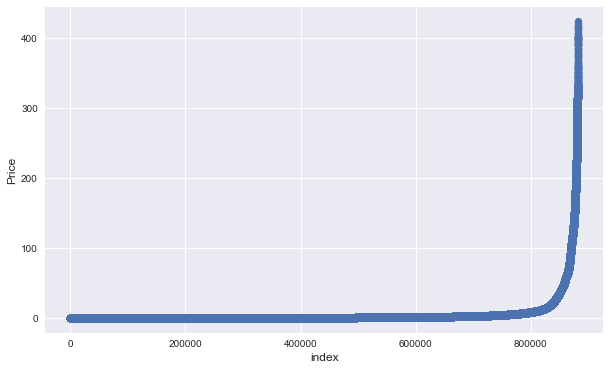

In [84]:
plt.figure(figsize = (10,6))
plt.scatter(range(train.shape[0]), np.sort(train.Price))
plt.xlabel('index', fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

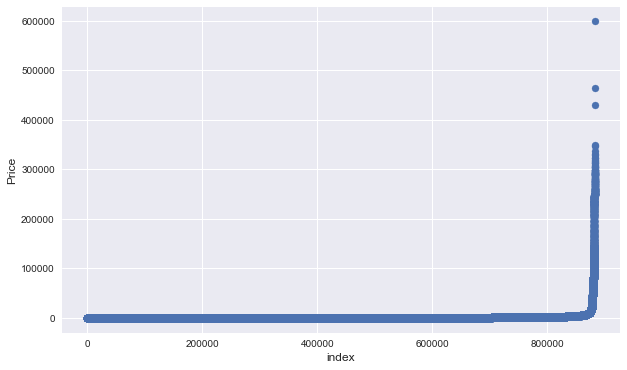

In [105]:
plt.figure(figsize = (10,6))
plt.scatter(range(train.shape[0]), np.sort(train.Number_Of_Sales))
plt.xlabel('index', fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

In [98]:
train.Price.describe()

count    881876.000000
mean          5.484011
std          22.472598
min           0.030000
25%           0.125000
50%           0.513000
75%           2.070000
max         424.148000
Name: Price, dtype: float64

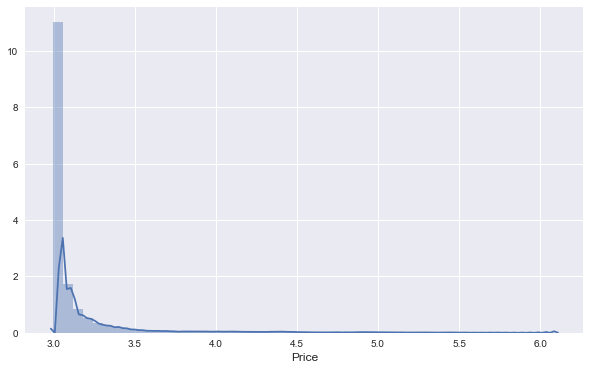

In [100]:
plt.figure(figsize = (10,6))
sns.distplot(np.log(train.Price.values + 20), bins=50, kde=True)
plt.xlabel('Price',fontsize=12)
plt.show()


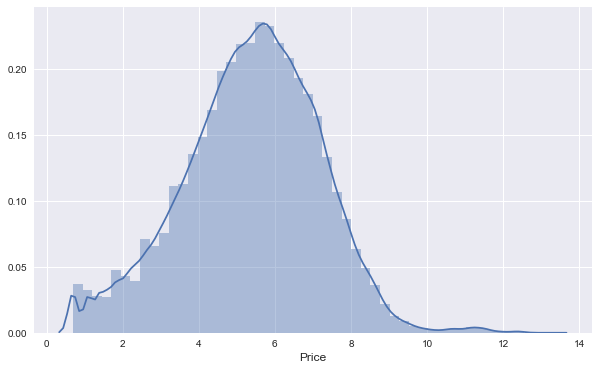

In [104]:
plt.figure(figsize = (10,6))
sns.distplot(np.log1p(train.Number_Of_Sales), bins=50, kde=True)
plt.xlabel('Price',fontsize=12)
plt.show()


### remove outlier

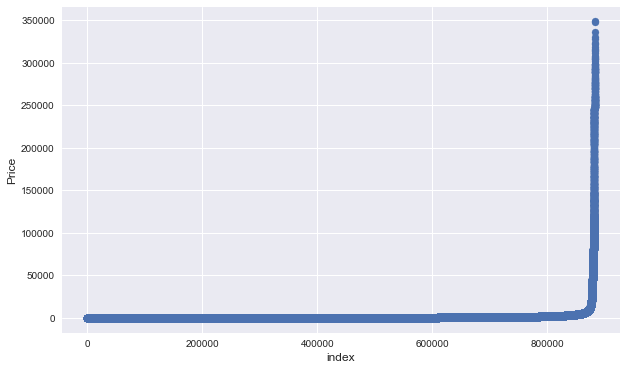

In [107]:
plt.figure(figsize = (10,6))
plt.scatter(range(train.shape[0]), np.sort(train.Number_Of_Sales))
plt.xlabel('index', fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

In [306]:
train = train.loc[train['Number_Of_Sales'] <= 340000]

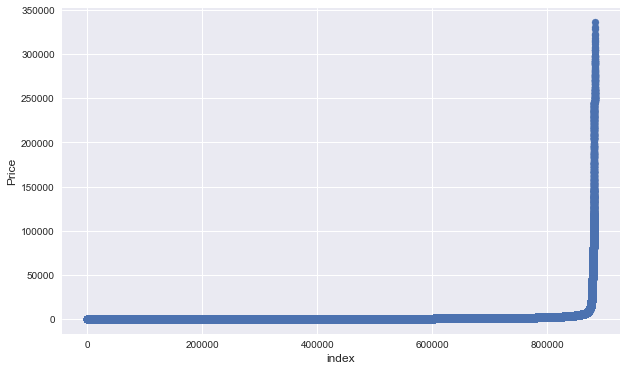

In [113]:
plt.figure(figsize = (10,6))
plt.scatter(range(train.shape[0]), np.sort(train.Number_Of_Sales))
plt.xlabel('index', fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

In [114]:
print train.shape # 5 rows deleted

(881871, 13)


In [116]:
train.head()

,ID,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales,dayofweek,weekyear,dayofmonth,is_quarter_start,month
0,30495_20140101,30495,2014-01-01,0,2.0,90,165.123,1,2,1,1,1,1
1,30375_20140101,30375,2014-01-01,0,2.0,307,68.666,5,2,1,1,1,1
2,30011_20140101,30011,2014-01-01,0,3.0,67,253.314,2,2,1,1,1,1
3,30864_20140101,30864,2014-01-01,0,2.0,315,223.122,1,2,1,1,1,1
4,30780_20140101,30780,2014-01-01,1,2.0,132,28.750,1,2,1,1,1,1


In [123]:
train['yearmonth'] = train.Datetime.astype(str).apply(lambda x: x[:4]+x[5:7])
grouped_df = train.groupby('yearmonth')['Price'].aggregate(np.median).reset_index()

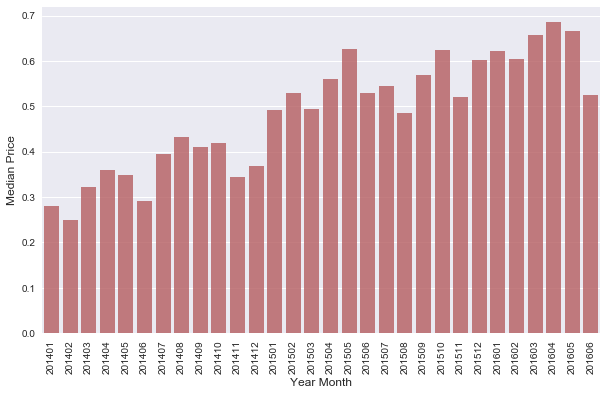

In [125]:
plt.figure(figsize = (10,6))
sns.barplot(grouped_df.yearmonth.values, grouped_df.Price.values, alpha = 0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

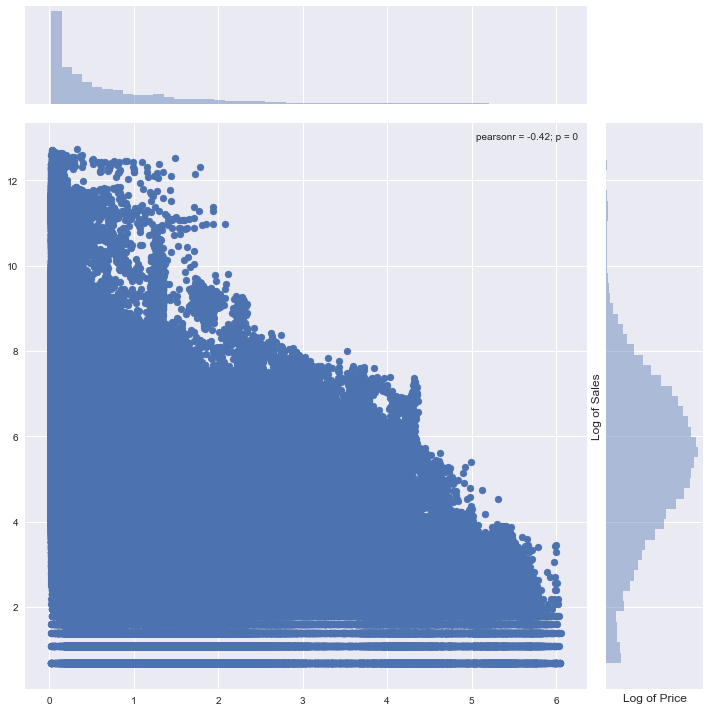

In [126]:
plt.figure(figsize=(10,6))
sns.jointplot(x=np.log1p(train.Price.values), y=np.log1p(train.Number_Of_Sales.values), size=10)
plt.ylabel('Log of Sales', fontsize=12)
plt.xlabel('Log of Price', fontsize=12)
plt.show()

### so mean features

In [307]:
med_price = train.groupby('Item_ID')['Price'].aggregate(np.median).reset_index()
med_price.rename(columns={'Price':'medByID'},inplace=True)

med_sales = train.groupby('Item_ID')['Number_Of_Sales'].aggregate(np.median).reset_index()
med_sales.rename(columns={'Number_Of_Sales':'medBySales'},inplace=True)

catone_med_price = train.groupby('Category_1')['Price'].aggregate(np.median).reset_index()
catone_med_price.rename(columns={'Price':'medCatOnePrice'},inplace=True)

catone_med_sales = train.groupby('Category_1')['Number_Of_Sales'].aggregate(np.median).reset_index()
catone_med_sales.rename(columns={'Number_Of_Sales':'medCatOneSales'},inplace=True)

cattwo_med_price = train.groupby('Category_2')['Price'].aggregate(np.median).reset_index()
cattwo_med_price.rename(columns={'Price':'medCatTwoPrice'},inplace=True)

cattwo_med_sales = train.groupby('Category_2')['Number_Of_Sales'].aggregate(np.median).reset_index()
cattwo_med_sales.rename(columns={'Number_Of_Sales':'medCatTwoSales'},inplace=True)

In [308]:
train.shape

(881871, 14)

In [309]:
train = pd.merge(train, med_price, on='Item_ID', how='left')
train = pd.merge(train, med_sales, on='Item_ID', how='left')
train = pd.merge(train, catone_med_price, on='Category_1', how='left')
train = pd.merge(train, catone_med_sales, on='Category_1', how='left')
train = pd.merge(train, cattwo_med_sales, on='Category_2', how='left')
train = pd.merge(train, cattwo_med_price, on='Category_2', how='left')

In [310]:
train.shape

(881871, 20)

In [155]:
test.shape

(266248, 11)

In [311]:
test = pd.merge(test, med_price, on='Item_ID', how='left')
test = pd.merge(test, med_sales, on='Item_ID', how='left')
test = pd.merge(test, catone_med_price, on='Category_1', how='left')
test = pd.merge(test, catone_med_sales, on='Category_1', how='left')
test = pd.merge(test, cattwo_med_sales, on='Category_2', how='left')
test = pd.merge(test, cattwo_med_price, on='Category_2', how='left')

In [312]:
test.shape

(266248, 18)

In [313]:
train['volumebyCat1'] = train['Price'] * train ['Number_Of_Sales']

In [314]:
volumne_by_cat1 = train.groupby('Category_1')['volumebyCat1'].aggregate(np.median).reset_index()

In [315]:
train.drop('volumebyCat1', inplace=True, axis=1)

In [316]:
train = pd.merge(train, volumne_by_cat1, on='Category_1', how='left')
test = pd.merge(test, volumne_by_cat1, on='Category_1', how='left')

In [317]:
train['volumebyCat2'] = train['Price'] * train['Number_Of_Sales']
volumne_by_cat2 = train.groupby('Category_2')['volumebyCat2'].aggregate(np.median).reset_index()
train.drop('volumebyCat2', inplace=True, axis=1)

In [318]:
train = pd.merge(train, volumne_by_cat2, on='Category_2', how='left')
test = pd.merge(test, volumne_by_cat2, on='Category_2', how='left')

### creating lag cols - Later

In [ ]:
colstrain_X = train[['Number_Of_Sales','Price','ID','Item_ID','month','weekyear','dayofweek']]

### remove skewness

In [328]:
train.head()

,ID,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales,item_count,dayofweek,...,is_quarter_start,month,medByID,medBySales,medCatOnePrice,medCatOneSales,medCatTwoSales,medCatTwoPrice,volumebyCat1,volumebyCat2
0,30495_20140101,30495,2014-01-01,0,2.0,90,165.123,1,908,2,...,1,1,124.9345,11.0,0.789,109.0,418.0,0.374,136.100,154.980
1,30375_20140101,30375,2014-01-01,0,2.0,307,68.666,5,911,2,...,1,1,44.2840,25.0,0.381,180.0,418.0,0.374,136.230,154.980
2,30011_20140101,30011,2014-01-01,0,3.0,67,253.314,2,849,2,...,1,1,296.7200,4.0,108.982,5.0,337.0,0.664,734.454,176.904
3,30864_20140101,30864,2014-01-01,0,2.0,315,223.122,1,907,2,...,1,1,126.2930,13.0,0.625,12.0,418.0,0.374,28.440,154.980
4,30780_20140101,30780,2014-01-01,1,2.0,132,28.750,1,623,2,...,1,1,60.3910,2.0,0.030,522.0,418.0,0.374,46.650,154.980


In [329]:
cols = ['medByID',
'medBySales',
'medCatOnePrice',
'medCatOneSales',
'medCatTwoSales',
'medCatTwoPrice',
'volumebyCat1',
'volumebyCat2']

In [330]:
for x in cols:
    train[x] = np.log1p(train[x]+10)

/home/manish/anaconda2/envs/package15/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log1p
  from ipykernel import kernelapp as app


In [331]:
for x in cols:
    test[x] = np.log1p(test[x]+10)

/home/manish/anaconda2/envs/package15/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log1p
  from ipykernel import kernelapp as app


In [332]:
train.head()

,ID,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales,item_count,dayofweek,...,is_quarter_start,month,medByID,medBySales,medCatOnePrice,medCatOneSales,medCatTwoSales,medCatTwoPrice,volumebyCat1,volumebyCat2
0,30495_20140101,30495,2014-01-01,0,2.0,90,165.123,1,908,2,...,1,1,4.835762,2.484907,0.581657,4.700480,6.037871,0.317726,4.920711,5.049728
1,30375_20140101,30375,2014-01-01,0,2.0,307,68.666,5,911,2,...,1,1,3.812954,3.258097,0.322808,5.198497,6.037871,0.317726,4.921658,5.049728
2,30011_20140101,30011,2014-01-01,0,3.0,67,253.314,2,849,2,...,1,1,5.696153,1.609438,4.700317,1.791759,5.823046,0.509224,6.600488,5.181244
3,30864_20140101,30864,2014-01-01,0,2.0,315,223.122,1,907,2,...,1,1,4.846492,2.639057,0.485508,2.564949,6.037871,0.317726,3.382354,5.049728
4,30780_20140101,30780,2014-01-01,1,2.0,132,28.750,1,623,2,...,1,1,4.117263,1.098612,0.029559,6.259581,6.037871,0.317726,3.863883,5.049728


### preparing for training

In [319]:
print train.shape
print test.shape

(881871, 22)
(266248, 20)


In [190]:
train.columns

Index([u'ID', u'Item_ID', u'Datetime', u'Category_3', u'Category_2',
       u'Category_1', u'Price', u'Number_Of_Sales', u'dayofweek', u'weekyear',
       u'dayofmonth', u'is_quarter_start', u'month', u'yearmonth', u'medByID',
       u'medBySales', u'medCatOnePrice', u'medCatOneSales', u'medCatTwoSales',
       u'medCatTwoPrice', u'volumebyCat1', u'volumebyCat2'],
      dtype='object')

In [335]:
cols_to_use = ['Category_3','Category_2','Category_1','dayofweek','weekyear',\
              'dayofmonth','is_quarter_start','month','medByID','medBySales','medCatOnePrice',\
              'medCatOneSales','medCatTwoSales','medCatTwoPrice','volumebyCat1','volumebyCat2']

### convert int to float

In [339]:
for x in cols_to_use:
    if train[x].dtype == 'int64':
        train[x] = train[x].astype('float')

In [341]:
for x in cols_to_use:
    if test[x].dtype == 'int64':
        test[x] = test[x].astype('float')

In [344]:
train[cols_to_use].dtypes

Category_3          float64
Category_2          float64
Category_1          float64
dayofweek           float64
weekyear            float64
dayofmonth          float64
is_quarter_start    float64
month               float64
medByID             float64
medBySales          float64
medCatOnePrice      float64
medCatOneSales      float64
medCatTwoSales      float64
medCatTwoPrice      float64
volumebyCat1        float64
volumebyCat2        float64
dtype: object

### fixing infinite values

In [358]:
train[cols_to_use].describe()

,Category_3,Category_2,Category_1,dayofweek,weekyear,dayofmonth,is_quarter_start,month,medByID,medBySales,medCatOnePrice,medCatOneSales,medCatTwoSales,medCatTwoPrice,volumebyCat1,volumebyCat2
count,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,8.818710e+05,8.818710e+05,881871.000000,8.818710e+05
mean,0.162507,2.365582,186.924195,2.999887,24.916525,15.823224,0.010285,6.081397,0.787852,5.475017,0.681938,5.423677,-inf,-inf,4.849112,-inf
std,0.368915,1.656581,130.754489,1.998496,15.072290,8.794396,0.100892,3.413233,0.990383,1.698746,0.841060,0.970146,NaN,NaN,1.548109,NaN
min,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.029559,0.693147,0.029559,1.791759,-inf,-inf,1.518857,-inf
25%,0.000000,1.000000,70.000000,1.000000,12.000000,8.000000,0.000000,3.000000,0.120446,4.382027,0.120446,5.003946,5.153292e+00,2.151114e-01,3.613132,3.536893e+00
50%,0.000000,2.000000,176.000000,3.000000,23.000000,16.000000,0.000000,6.000000,0.393393,5.552960,0.397433,5.472271,5.153292e+00,3.177262e-01,4.921658,5.049728e+00
75%,0.000000,3.000000,307.000000,5.000000,38.000000,23.000000,0.000000,9.000000,1.091252,6.668228,0.764072,6.056784,6.037871e+00,5.092243e-01,5.782939,5.181244e+00
max,1.000000,5.000000,413.000000,6.000000,53.000000,31.000000,1.000000,12.000000,5.696153,12.340905,5.095901,8.324336,6.037871e+00,6.291419e-01,9.131232,5.315555e+00


In [357]:
train[cols_to_use].replace(np.inf, 6, inplace=True)

/home/manish/anaconda2/envs/package15/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [355]:
test.replace(np.inf,6,inplace=True)

### Ridge Regression

In [207]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [321]:
train_X = train.loc[train['Datetime'] < "2016-01-01"]
valid_X = train.loc[train['Datetime'] >= '2016-01-01']

In [322]:
target1 = np.log1p(train_X['Price'])
target2 = np.log1p(train_X['Number_Of_Sales'])

In [195]:
print train_X.shape
print valid_X.shape

(566869, 22)
(223394, 22)


In [196]:
ridgealphas = [0.021,0.0009,0.01,0.1,0.3,0.5,0.9,1,4,7,10,15,20,25,30,40,70,100]

In [197]:
getrid = RidgeCV(alphas=ridgealphas)

In [203]:
getrid.fit(train_X[cols_to_use], target1)

RidgeCV(alphas=[0.021, 0.0009, 0.01, 0.1, 0.3, 0.5, 0.9, 1, 4, 7, 10, 15, 20, 25, 30, 40, 70, 100],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [204]:
getrid.alpha_

4.0

In [205]:
ridge_train = Ridge(alpha=4)
ridge_train.fit(train_X[cols_to_use], target1)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [211]:
ridpred = ridge_train.predict(valid_X[cols_to_use])
ridpred = np.exp(ridpred)-1
print np.sqrt(mean_squared_error(valid_X['Price'], ridpred))

243.755376611


In [212]:
pd.DataFrame({'real':valid_X['Price'], 'preds':ridpred})

,preds,real
726,44.683723,115.141
727,45.032243,116.204
728,45.029778,111.777
729,46.056457,107.669
730,46.053938,108.306
731,46.051418,111.028
732,46.048898,105.217
733,46.046379,110.585
734,46.043860,108.046
735,46.041340,109.255


### Decision Tree

In [324]:
train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)

In [214]:
from sklearn.tree import DecisionTreeRegressor

In [342]:
DT = DecisionTreeRegressor(max_depth = 6, min_samples_split=11, criterion='mse',max_features='auto')
DT.fit(train[cols_to_use], np.log1p(train['Price']))
dtpred = DT.predict(test[cols_to_use])
dtpred = np.exp(dtpred)-1

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [272]:
DT2 = DecisionTreeRegressor(max_depth = 6, min_samples_split=11, criterion='mse',max_features='auto')
DT2.fit(train_X[cols_to_use], target2)
dtpred2 = DT2.predict(test[cols_to_use])
dtpred2 = np.exp(dtpred2)-1


In [268]:
dtpred2[:10]

array([ 2.69755137,  2.69755137,  2.69755137,  2.69755137,  2.69755137,
        2.69755137,  2.69755137,  2.69755137,  2.69755137,  2.69755137])

In [271]:
print np.sqrt(mean_squared_error(valid_X['Price'], dtpred))

ValueError: Found input variables with inconsistent numbers of samples: [223394, 227056]

### create submission

In [273]:
subpy1 = pd.DataFrame({'ID':test.ID, 'Price':dtpred, 'Number_Of_Sales':dtpred2})
subpy1.to_csv('subpy1.csv', index=False)

In [278]:
[x for x in test['ID'] if x not in subpy1['ID']]

['30413_20160701',
 '30413_20160702',
 '30413_20160703',
 '30413_20160704',
 '30413_20160705',
 '30413_20160706',
 '30413_20160707',
 '30413_20160708',
 '30413_20160709',
 '30413_20160710',
 '30413_20160711',
 '30413_20160712',
 '30413_20160713',
 '30413_20160714',
 '30413_20160715',
 '30413_20160716',
 '30413_20160717',
 '30413_20160718',
 '30413_20160719',
 '30413_20160720',
 '30413_20160721',
 '30413_20160722',
 '30413_20160723',
 '30413_20160724',
 '30413_20160725',
 '30413_20160726',
 '30413_20160727',
 '30413_20160728',
 '30413_20160729',
 '30413_20160730',
 '30413_20160731',
 '30413_20160801',
 '30413_20160802',
 '30413_20160803',
 '30413_20160804',
 '30413_20160805',
 '30413_20160806',
 '30413_20160807',
 '30413_20160808',
 '30413_20160809',
 '30413_20160810',
 '30413_20160811',
 '30413_20160812',
 '30413_20160813',
 '30413_20160814',
 '30413_20160815',
 '30413_20160816',
 '30413_20160817',
 '30413_20160818',
 '30413_20160819',
 '30413_20160820',
 '30413_20160821',
 '30413_2016

In [279]:
subpy1.head()

,ID,Number_Of_Sales,Price
0,30413_20160701,2.697551,179.001187
1,30413_20160702,2.697551,179.001187
2,30413_20160703,2.697551,179.001187
3,30413_20160704,2.697551,179.001187
4,30413_20160705,2.697551,179.001187


In [274]:
subpy1.shape

(227056, 3)


## GLMNET 

In [213]:
from sklearn.linear_model import ElasticNetCV,ElasticNet